# Работа с изображениями
(cv_basics)=

Есть, пожалуй, 2 основных библиотеки для работы с изображениями в `python`.
- [Pillow](https://pillow.readthedocs.io/en/stable/index.html) позволяет загружать, выводить на экран, редактировать и сохранять изображения;
- [openCV](https://docs.opencv.org/4.x/index.html) --- полноценный фреймворк для обработки изображений.

Стоит упомянуть, что 
- загрузить, вывести и сохранить изображение можно также средствами библиотеки `matplotlib`;
- часть функционала по обработке изображений можно найти в библиотеке `scipy` в общем, и в модуле [scipy.ndimage](https://scipy.github.io/devdocs/reference/ndimage.html)
- существует библиотека-аналог для `openCV` --- [scikit-image](https://scikit-image.org/). 

В ячейке ниже импортируются необходимые библиотеки (`cv2` соответствует `openCV`), а также определяется функция для красивого вывода изображения в заданных осях, которая будет использоваться всюду далее.

In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt
import PIL
import cv2


image_folder = os.path.join("..", "..", "_static", "lecture_specific", "cv")


def show_image(ax, image, title=None, cmap=None):
    """
    Вывести изображение в указанных осях.
    """
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

## Изображения в оттенках серого

### Чтение с диска

Загрузить изображение, например, с диска можно
- методом [cv2.imread](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) --- возвращает массив `numpy`;
- методом [plt.imread](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.imread.html) --- возвращает массив `numpy`;
- методом [PIL.Image.open](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) --- возвращает экземпляр класса [PIL.Image.Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image), который можно преобразовать к массиву `numpy`, передав его в качестве аргумента методу `numpy.array`.

Начнем с черно-белых изображений, а если быть точнее --- изображений в оттенках серого. 

Ниже приводится пример того, как можно загрузить изображения, используя вышеперечисленные методы. 

In [10]:
path = os.path.join(image_folder, "gray.jpg")


images = {
    "openCV": cv2.imread(path, cv2.IMREAD_GRAYSCALE),
    "matplotlib": plt.imread(path),
    "Pillow": np.array(PIL.Image.open(path))
}


for library, image in images.items():
    print(f"{library:10}: shape={image.shape}, dtype={image.dtype}")    

openCV    : shape=(512, 512), dtype=uint8
matplotlib: shape=(512, 512), dtype=uint8
Pillow    : shape=(512, 512), dtype=uint8


Видим, что все массивы одинаковой формы (512, 512) с 8-битным беззнаковым целочисленным типом данных. 

- форма массива (512, 512) соответствует [разрешению изображения](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0));
- количество бит, которое используется для представления цвета при кодировании изображения, называют [глубинной цвета](https://ru.wikipedia.org/wiki/%D0%93%D0%BB%D1%83%D0%B1%D0%B8%D0%BD%D0%B0_%D1%86%D0%B2%D0%B5%D1%82%D0%B0). Данное изображение имеет глубину цвета 8 бит, т.е. цвет каждого пикселя кодируется числом в диапазоне от 0 до 255, где 0 соответствует черному цвету, 255 соответствует белому цвету, а все промежуточные цвета --- оттенкам серого.

```{note}
Для хранения изображений обычно используются целочисленные яркости с разной глубинной цвета, но при обработке изображений яркости пикселей чаще представляют действительными числами в диапазоне от 0 до 1 из-за более адекватной арифметики.   
```

Проверим, содержат ли массивы, считанные всеми библиотекам, одинаковые значения.

In [12]:
from itertools import combinations


def L1_distance(x, y):
    return np.abs(x - y).sum()


for (lib1, image1), (lib2, image2) in combinations(images.items(), 2):
    diff = L1_distance(image1, image2)
    print(f"{lib1:10} and {lib2:10}: {diff}")

image = images["openCV"]

openCV     and matplotlib: 0
openCV     and Pillow    : 0
matplotlib and Pillow    : 0


Видим, что все три библиотеки считали абсолютно одинаковые массивы.

Выясним, в каком диапазоне элементы массива принимают значения. 

In [8]:
print(f"Элементы массива принимают значения в диапазоне от {image.min()} до {image.max()}.")

Тип данных uint8.
Элементы массива принимают значения в диапазоне от 19 до 246.


Т.е. самый темный пиксель этого изображения имеет яркость 19, а самый яркий 246. Абсолютно черных и белых пикселей в этом изображении нет.

Выведем это изображение средствами `matplotlib`.

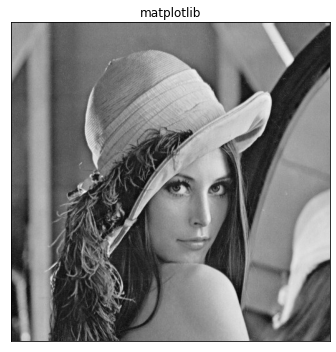

In [14]:
fig, ax = plt.subplots(figsize=(5, 5), layout="tight")
show_image(ax, image, title="matplotlib", cmap="gray")

Библиотека `openCV` тоже умеет выводить изображения, но для этого создаёт отдельное окно. Изображения библиотеки `PIL` можно выводить в `jupyter notebook` непосредственно.


Т.к. мы уже поняли, что `cv2_image`, `pil_image` и `plt_image` в точности совпадают, то заведем две новые переменные, которые пригодятся в будущем. 
- `image` --- изображение, считанное библиотекой `Pillow` (экземпляр класса `PIL.Image.Image`);
- `array` --- его представление в виде массива `numpy`;

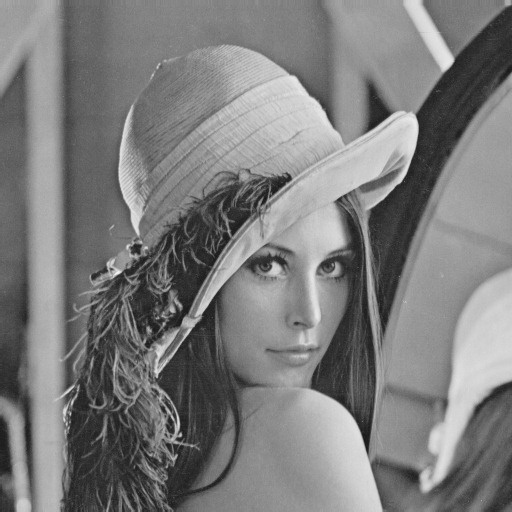

In [15]:
image = PIL.Image.open(path)
array = np.array(image)

image

### Яркости пикселей

Т.к. изображение представляется в виде массива, то над ним можно производить математические операции.

Прибавим к изображению константу, что выйдет.

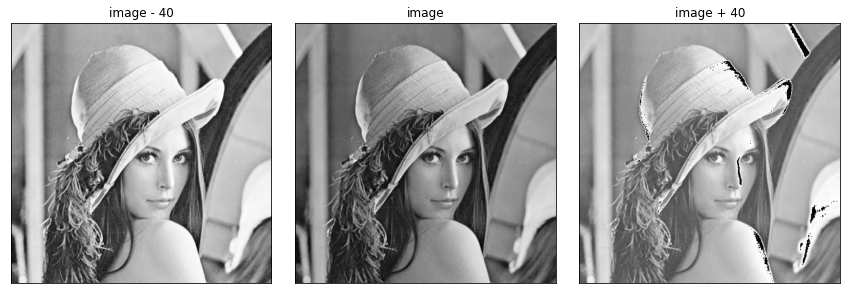

In [34]:
c = 40

fig, axs = plt.subplots(figsize=(12, 4), ncols=3, layout="tight")
show_image(axs[0], np.sin(array/255. * np.pi / 2), title=f"image - {c}", cmap="gray")
show_image(axs[1], array, title="image", cmap="gray")
show_image(axs[2], array+c, title=f"image + {c}", cmap="gray")

- Т.к. массив хранит яркости пикселей, то прибавляя положительную константу, мы увеличиваем яркости всех пикселей на неё и получаем более яркое (светлое изображение).
- Т.к. для яркости каждого пикселя используется всего 8 бит, то возможно переполнение, т.е. очень яркие пиксели могут сдвинуться в темную область.

В качестве демонстрации создадим матрицу следующего вида и выведем её в качестве изображения.

$$
\begin{pmatrix}
0 & 0 & 0 & \cdots & 0\\
1 & 1 & 1 & \cdots & 1\\
2 & 2 & 2 & \cdots & 2\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
255 & 255 & 255 & \cdots & 255
\end{pmatrix}.
$$


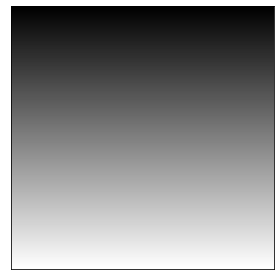

In [25]:
math_array = np.ones(shape=(1, 256), dtype=np.uint8) * np.arange(256, dtype=np.uint8).reshape(256, 1) 

fig, ax = plt.subplots(figsize=(4, 4), layout="tight")
show_image(ax, math_array, cmap="gray")

Инвертировать изображение можно вычесть его из 255.

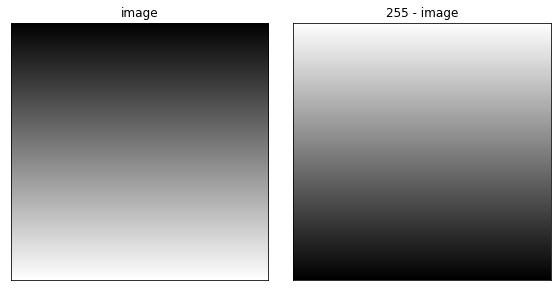

In [26]:
fig, axs = plt.subplots(figsize=(8, 4), ncols=2, layout="tight")
show_image(axs[0], math_array, title="image", cmap="gray")
show_image(axs[1], 255 - math_array, title=f"255 - image", cmap="gray")

### Манипуляции на формой массива

Чтобы обрезать изображения, можно использовать срезы.

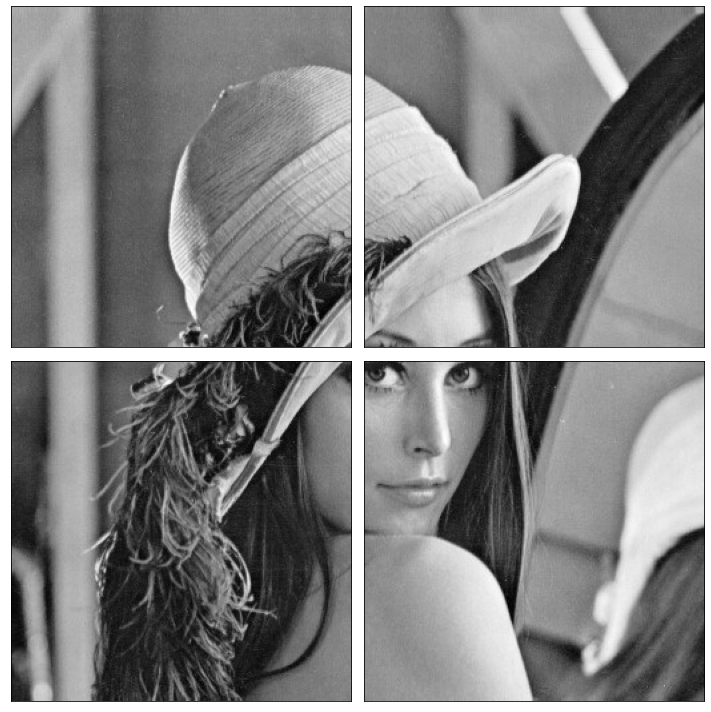

In [9]:
H, W = array.shape
h, w = H // 2, W // 2

top_left = array[:h, :w]
top_right = array[:h, w:]
bottom_left = array[h:, :w]
bottom_right = array[h:, w:]

fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, layout="tight")
show_image(axs[0, 0], top_left, cmap="gray")
show_image(axs[0, 1], top_right, cmap="gray")
show_image(axs[1, 0], bottom_left, cmap="gray")
show_image(axs[1, 1], bottom_right, cmap="gray")

Аналогично, можно отразить изображение по вертикали, горизонтали и т.д.

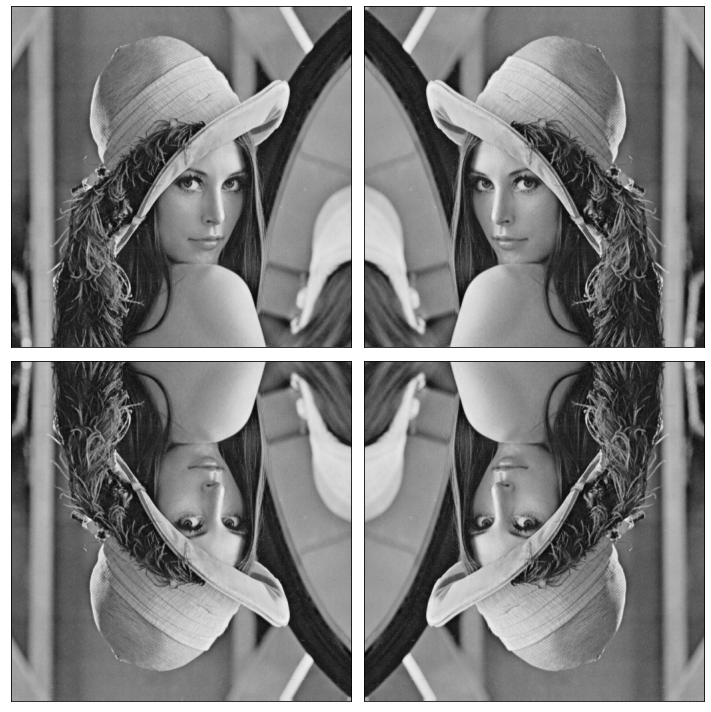

In [10]:
hor_flip = array[:, ::-1]
vert_flip = array[::-1, :]
both = array[::-1, ::-1]


fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, layout="tight")
show_image(axs[0, 0], array, cmap="gray")
show_image(axs[0, 1], hor_flip, cmap="gray")
show_image(axs[1, 0], vert_flip, cmap="gray")
show_image(axs[1, 1], both, cmap="gray")

Чтобы повернуть изображение на угол кратный $90^\circ$, можно использовать метод [np.rot90](https://numpy.org/doc/stable/reference/generated/numpy.rot90.html).

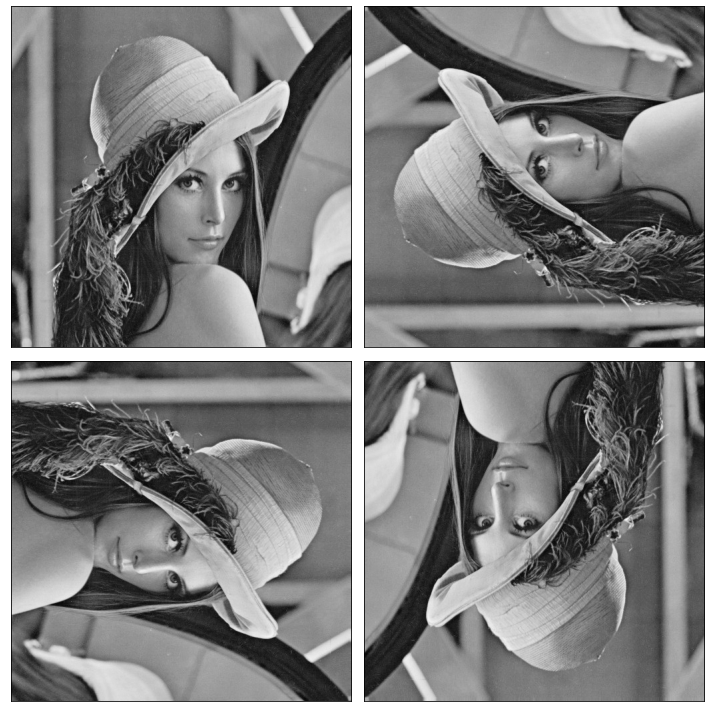

In [33]:
fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, layout="tight")
show_image(axs[0, 0], array, cmap="gray")
show_image(axs[0, 1], np.rot90(array, 1), cmap="gray")
show_image(axs[1, 1], np.rot90(array, 2), cmap="gray")
show_image(axs[1, 0], np.rot90(array, 3), cmap="gray")

### Поворот на произвольный угол

Чтобы повернуть изображение на произвольный угол, необходимо интерполировать значения в узлах новой решетки.

`Pillow` позволяет вращать изображения методом [rotate](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.rotate) класса `PIL.Image.Image`.

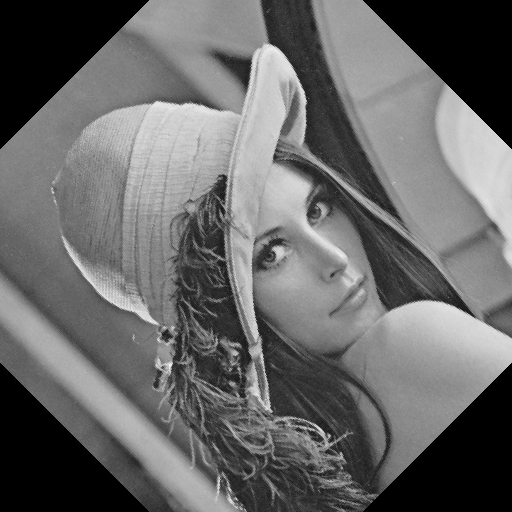

In [37]:
image.rotate(45, expand=False, fillcolor=PIL.Image.NEAREST)

`openCV` имеет чуть более общий интерфейс и позволяет применять аффинное преобразование к изображению, частным случаям которого является поворот изображения вокруг выбранной точки.

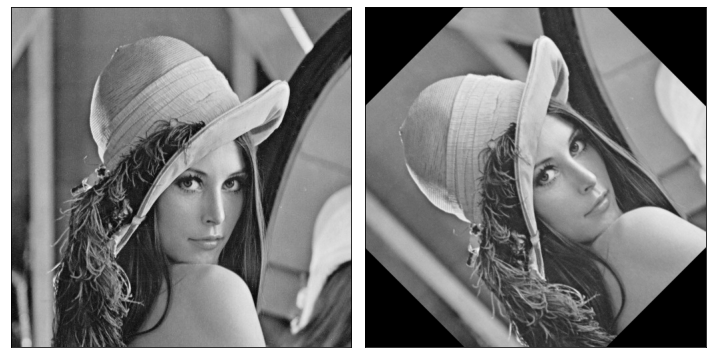

In [38]:
rotation_center = (h, w)
rotation_angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(rotation_center, rotation_angle, scale)

rotated_image = cv2.warpAffine(array, rotation_matrix, dsize=(H, W))

fig, axs = plt.subplots(figsize=(10, 10), ncols=2, layout="tight")
show_image(axs[0], array, cmap="gray")
show_image(axs[1], rotated_image, cmap="gray")

## Цветные изображения

Всё, что мы перечислили для изображений в оттенках серого, работает аналогично и для цветных изображений, но по каналам.

Все перечисленные методы чтения изображений отработают и для цветных изображений.

In [33]:
path = os.path.join(image_folder, "lena.jpg")

images = {
    "openCV": cv2.imread(path),
    "matplotlib": plt.imread(path),
    "Pillow": np.array(PIL.Image.open(path))
}


for library, image in images.items():
    print(f"{library:10}: shape={image.shape}, dtype={image.dtype}")

openCV    : shape=(512, 512, 3), dtype=uint8
matplotlib: shape=(512, 512, 3), dtype=uint8
Pillow    : shape=(512, 512, 3), dtype=uint8


Получаем массив формы $512\times512\times3$, где 3 соответствует трём каналам: красный, зеленый и голубой. Но даже здесь есть один подвох. Выведем три получившихся массива.

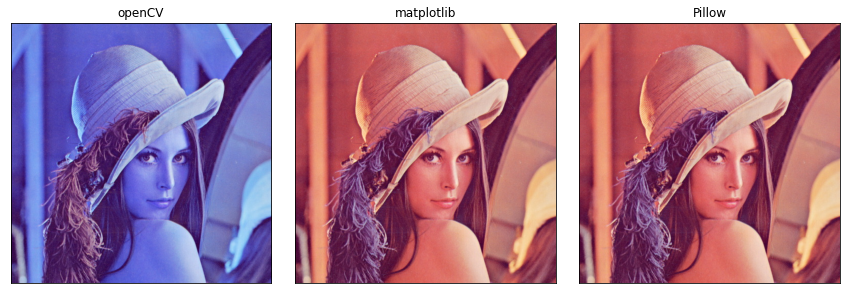

In [34]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=3, layout="tight")

for i, lib in enumerate(images):
    show_image(axs[i], images[lib], title=lib)

Изображение, считанной библиотекой выглядит странно. Дело в том, что 
- `matplotlib` и `Pillow` хранят изображения в формате `RGB`, т.е. первый канал изображения соответствует красному, второй зеленому, а третий синему. 
- `openCV` хранит изображения в формате `GBR`, т.е. красный и зеленый поменяны местами.

Для вывода изображения мы использовали метод библиотеки `matplotlib`, который ожидает изображения в формате `RGB`, а в случае с изображением, считанным библиотекой `openCV`, получает `BGR` изображение.

Чтобы нагляднее это проиллюстрировать, проделаем то же самое на изображении из базовых цветов.

```{figure} /_static/lecture_specific/cv/colors.png
```

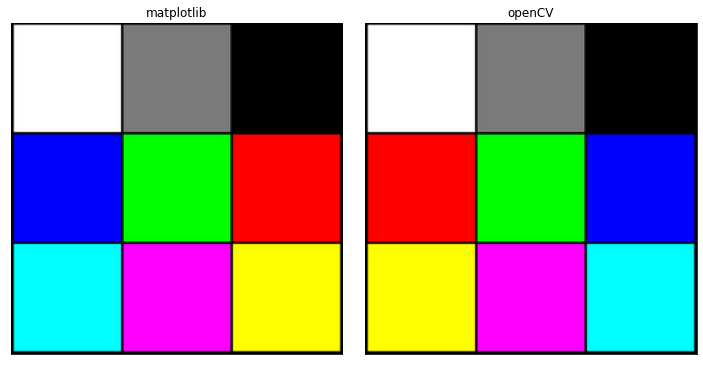

In [35]:
path = os.path.join(image_folder, "colors.png")

cv2_image = cv2.imread(path)
plt_image = plt.imread(path)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")

show_image(axs[0], plt_image, title="matplotlib")
show_image(axs[1], cv2_image, title="openCV")

Видим, что левое изображение выглядит также, как и должно, а на правом 
- красное поменялось местами с синим; 
- желтое (смесь красного и зеленого) поменялось местами с голубым (смесь синего и зеленого).

Ниже определяются функции, которые выводят само изображения и все его каналы по очереди.

In [36]:
def show_channel(ax, image, channel, color=True):
    if color:
        to_show = np.zeros_like(image)
        to_show[..., channel] = image[..., channel]
        show_image(ax, to_show, title=f"channel:{channel}")
    else:
        to_show = image[..., channel]
        show_image(ax, to_show, cmap="gray", title=f"channel:{channel}")
        
        
    
def show_channels(image, title, color=True):
    fig, axs = plt.subplots(figsize=(12, 3), ncols=4, layout="tight")
    fig.suptitle(title)
    
    show_image(axs[0], image, title="all channels")
    for i in range(3): 
        show_channel(axs[i + 1], image, i, color=color)

Выведем каналы изображений. Т.к. один канал --- это двухмерная матрица, то его можно считать изображением в оттенках серого: чем больше значение в этом канале, тем ярче белее пиксель.

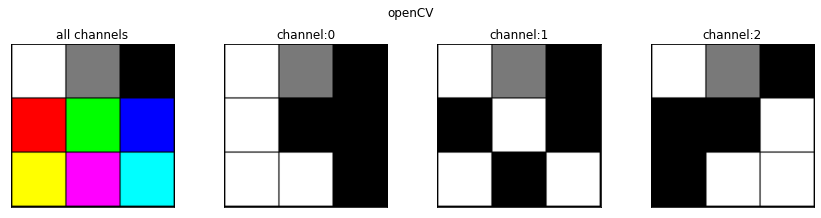

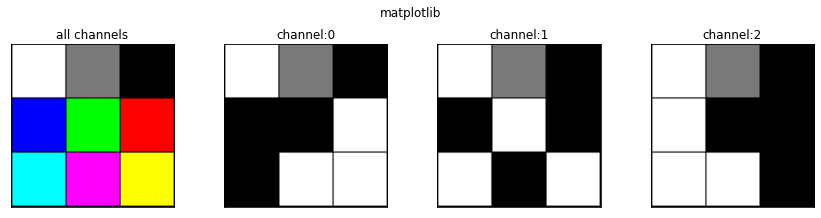

In [37]:
show_channels(cv2_image, "openCV", False)
show_channels(plt_image, "matplotlib", False)

Здесь отчетливо видно, что в `openCV` первый и третий канал перепутаны местами.

Библиотека `openCV` позволяет преобразовать изображение из одной цветовой схемы в другую методом [cv2.cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). В частности, этим методом можно из `GBR` перейти в `RGB`.

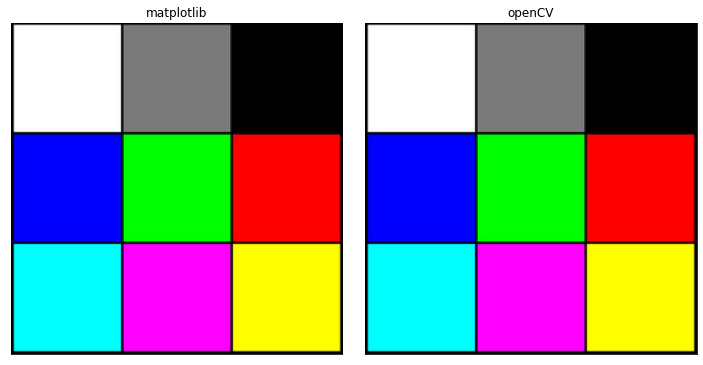

In [38]:
cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], plt_image, title="matplotlib")
show_image(axs[1], cv2_image, title="openCV")

Чтобы получше прочувствовать, то как комбинируются цвета из палитры `RGB`, выведем те же каналы, но в цвете.

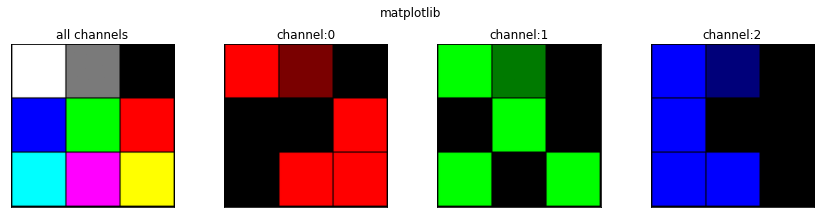

In [39]:
show_channels(plt_image, "matplotlib", True)

- белый --- максимальная яркость всех каналов;
- черный --- нулевая яркость всех каналов;
- серый --- средняя яркость всех каналов;
- красный, зеленый и синий --- максимальная яркость в одном из каналов, и нулевая в остальных;
- голубой, фиолетовый и желтый --- аддитивные комбинации двух из базовых цветов.

Как получить из цветного изображение черно-белое? Чтобы это сделать, необходимо от трехканального изображения, перейти к двухканальному. 

Самый наивный способ: просто сложить все каналы. Сложим все каналы, но перед этим поделим массив на число с плавающей точкой 255, чтобы уйти от ограничений целочисленной арифметики. Все современные библиотеки работы с изображениями позволяют задавать яркость как целыми числом, так и действительным числом от 0 до 1.

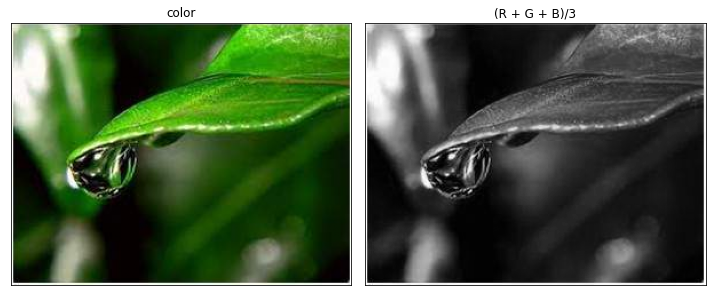

In [40]:
path = os.path.join(image_folder, "drop.jpg")
image = plt.imread(path) / 255. 
grayscale = image.mean(axis=2)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], image, title="color")
show_image(axs[1], grayscale, cmap="gray", title="(R + G + B)/3")

На самом деле известно, что разные цвета не дают одинаковый вклад в общую яркость, поэтому лучше, например, складывать каналы с коэффициентами 
- 0.222 для красного канала;
- 0.666 для зеленого калана;
- 0.111 для синего канала.

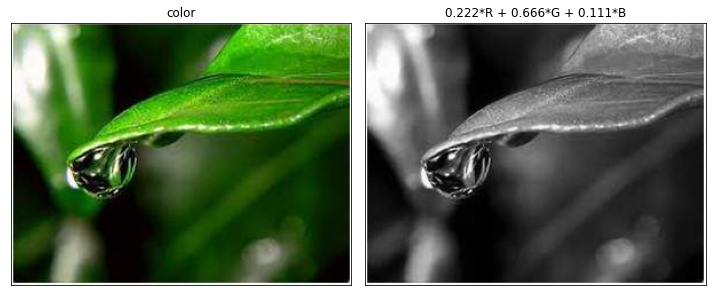

In [41]:
weights = (0.222, 0.666, 0.111)
grayscale = sum(weights[i] * image[..., i] for i in range(3))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], image, title="color")
show_image(axs[1], grayscale, cmap="gray", title=f"{weights[0]}*R + {weights[1]}*G + {weights[2]}*B")

Есть ещё более сложные формулы, которые дают ещё лучший результат. 

Преобразовать цветное изображение в черно-белом можно все тем же методом `cv2.cvtColor`.

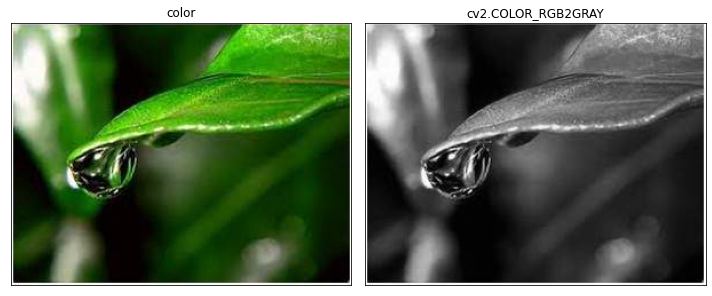

In [42]:
image = plt.imread(path)
grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], image, title="color")
show_image(axs[1], grayscale, cmap="gray", title=f"cv2.COLOR_RGB2GRAY")

`RGB` --- не единственный способ, представлять цветные изображения. В ряде задач удобнее использовать другие палитры. 

Рассмотрим палитру [Hue-Saturation-Value](https://en.wikipedia.org/wiki/HSL_and_HSV). В ней `Hue` отвечает за сам цвет, `Saturation` --- за насыщенность этого цвета, а `Value` за яркость.

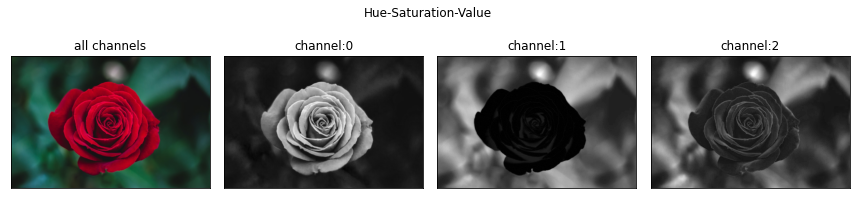

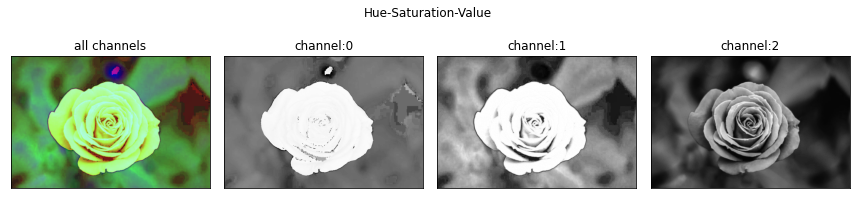

In [80]:
path = os.path.join(image_folder, "rose.jpg")
image = plt.imread(path)

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
show_channels(image, "Hue-Saturation-Value", False)
show_channels(hsv_image, "Hue-Saturation-Value", False)

В  пространстве гораздо удобнее производить операции над цветом изображения, т.к. именно за цвет отвечает канал `hue`. 

```{figure} /_static/lecture_specific/cv/hsv_cylinder.png
```

Например, оттенки красного цвета имеют `hue` в диапазоне приблизительно от 155 до 179. Найдем [маску](https://en.wikipedia.org/wiki/Mask_(computing)), соответствующую пикселям красного цвета. 

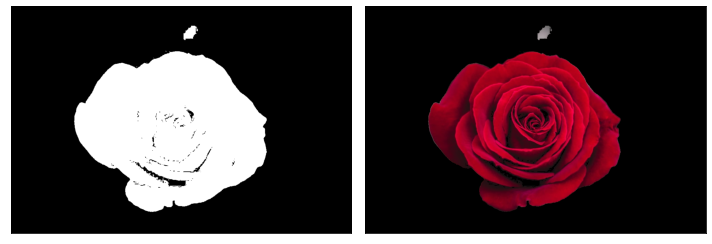

In [99]:
lower_red = 155
upper_red = 179
hue = hsv_image[..., 0]

hue_mask =  (lower_red <= hue) & (hue <= upper_red) 
hue_mask = np.expand_dims(hue_mask, axis=2)
masked_image = hue_mask * image

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], hue_mask, cmap="gray")
show_image(axs[1], masked_image)

Даже такой простой способ позволил неплохо выделить весь красный цвета на изображении, но зацепил и белый, т.к. белый цвет можно представить в качестве красного с очень низкой насыщенностью. Отфильтруем белый цвет ещё одной маской по каналу насыщенности.  

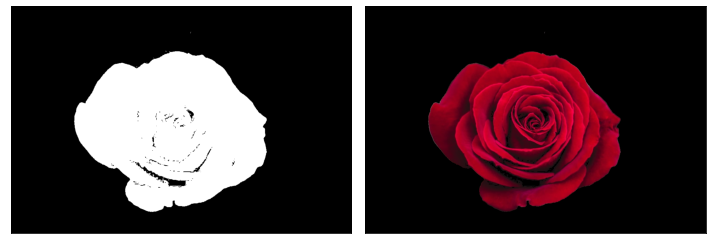

In [100]:
upper_white = 19
saturation = hsv_image[..., 1]

saturation_mask = (saturation >= upper_white)
saturation_mask = np.expand_dims(saturation_mask, axis=2)
mask = (hue_mask & saturation_mask)
masked_image = mask * image

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], mask, cmap="gray")
show_image(axs[1], masked_image)

Такая маска очень хорошо вырезает розу без лишних элементов. Далее она может быть использована для того, чтобы, например, вырезать розу с этого изображения и вставить её в другое. 

Сделаем на основе этой маски изображение цветное внутри маски и черно-белое снаружи.

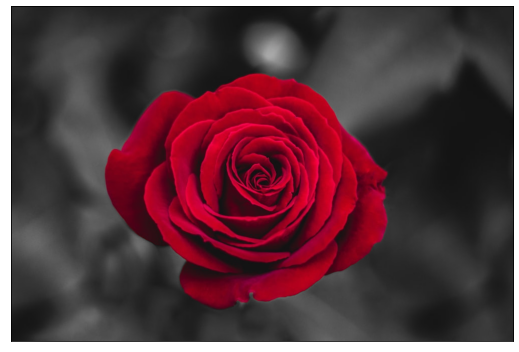

In [102]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

red_gray_image = mask * image + ~mask * gray 
fig, ax = plt.subplots(figsize=(10, 5), layout="tight")
show_image(ax, red_gray_image, cmap="gray")

Код в ячейке ниже позволяет продемонстрировать влияние параметра `hue`.  

In [105]:
from IPython.display import display
from ipywidgets import interact
import ipywidgets as widgets

image = red_gray_image 
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

def plot_histograms(ax, image):
    colors = ('b','g','r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        ax.plot(hist, color=color)
    

def interact_hsv(hue=0):
    fig, axs = plt.subplots(figsize=(12, 5), ncols=2, layout="tight")
    delta = np.array([[[hue, 0, 0]]], dtype=np.uint8)
    image = cv2.cvtColor(hsv_image + delta, cv2.COLOR_HSV2RGB)
    show_image(axs[0], image)
    
    axs[1].set_xlim([0, 255])
    axs[1].set_ylim([0, 5000])
    plot_histograms(axs[1], image)

_ = interact(interact_hsv,
         hue=widgets.IntSlider(min=0, max=255, value=200, step=5),
)

interactive(children=(IntSlider(value=200, description='hue', max=255, step=5), Output()), _dom_classes=('widg…